In [1]:
#1.1
class Rectangular():
    
    def __init__(self,length,breadth):
        self.length = length
        self.breadth = breadth
        
    def area(self):
        return self.length * self.breadth
    def perimeter(self):
        return 2*(self.length+self.breadth)
myRec = Rectangular(10,20)
print(myRec.area())
print(myRec.perimeter())    

200
60


In [2]:
#1.2
import numpy as np
length= np.random.randint(1,100,10)
width = np.random.randint(1,100,10)

a = np.array(length)
b = np.array(width)

print("length: ",a)
print("breadth: ",b)

myRec = Rectangular(a,b)
print("area: ",myRec.area())
print("perimeter: ",myRec.perimeter())

length:  [91 54 38 93 72 90 15 99 13 11]
breadth:  [33 85 80 41 80 75 94  7 56 74]
area:  [3003 4590 3040 3813 5760 6750 1410  693  728  814]
perimeter:  [248 278 236 268 304 330 218 212 138 170]


In [3]:
import matplotlib.pyplot as plt


In [4]:
#2
class Time():
    def __init__(self,hour,minute,second):
        self.hour = hour
        self.minute = minute
        self.second = second
    
    def addTime(self,time):
        self.second += time.second
        if self.second>=60:
            self.second,self.minute = self.second%60,self.minute + self.second//60
        
        self.minute += time.minute
        if self.minute>=60:
            self.minute,self.hour = self.minute%60,self.hour+self.minute//60
        
        self.hour += time.hour
    
    def DisplayTime(self):
        print(f'{self.hour} hr {self.minute} mins and {self.second} seconds')
        
    def DisplaySecond(self):
        self.second = self.hour*3600 + self.minute*60 + self.second
        print(self.second)
t1 = Time(2,12,45)
t2 = Time(2,44,45)
t1.addTime(t2)
t1.DisplayTime()
t1.DisplaySecond()
t2.DisplaySecond()

4 hr 57 mins and 30 seconds
17850
9885


In [78]:
#3 Random Number Generator
class LCG():
    def __init__(self,seed,multiplier,increment,modulus):
        self.seed =seed
        self.multiplier = multiplier
        self.increment = increment
        self.modulus = modulus
        
    def getSeed(self):
        return (self.seed)
    
    def SetSeed(self,inputSeed):
        self.seed = inputSeed
        return (self.seed)
    
    def generate(self):
        self.seed = (self.seed*self.multiplier +self.increment)%self.modulus
        self.SetSeed(self.seed)
        return(self.seed)
    
    def nextNumbers(self,n):
        for i in range(n):
            #print(self.generate())
            print(self.generate()/2**32)
            plt.scatter(self.generate()/2**32,i)
        

1.3969838619232178e-09
4.2049214243888855e-07
0.6596148065291345
0.0012310813181102276
0.6854860871098936
0.8209961163811386
0.06542350118979812
0.5513265277259052
0.7161383791826665
0.7435504975728691


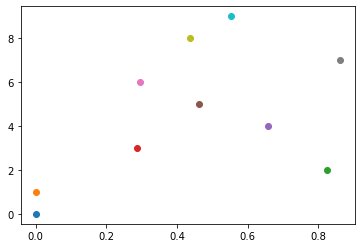

In [82]:
class SCG(LCG):
    def __init__(self,seed,multiplier,increment,modulus):
        self.seed = seed
        self.multiplier = multiplier
        self.increment = increment
        self.modulus = modulus
        if self.seed%4!=2:
            print("error")
    #    else:
            
    def generate(self):
        if self.seed%4!=2:
            ValueError("error")
        else:
            self.seed = (self.seed*(self.seed + 1))%self.modulus
            return (self.seed)
        
    
        
a = LCG(1,1103515245,12345,2**32)
b = SCG(2,1103515245,12345,2**32)
b.nextNumbers(10)
#a.nextNumbers(10)
    

In [ ]:
#4point.py
class point():
    def __init__(self,x,y):
        self.x = x
        self.y = y
        
    def cal(self):
        return sqrt(self.x**2 + self.y**2)
    

In [1]:
#MCTest.py
import time
import numpy as np

from generator import LCG,SCG
from point import point

def test(gen, num_points=10000000):
    ''' Tests a generator by estimating the ratio of points that fall within a circle. '''
    start = time.time()
    it = iter(gen)
    points = np.fromiter(it, float, count=num_points)
    points = 2 * ((points - min(points)) / (max(points) - min(points))) - 1

    circle_count = 0
    for i in range(0, num_points):
        p = Point(points[i], points[i])
        circle_count += 1 if p.distance() <= 1 else 0

    end = time.time()

    print(f'\nTested {num_points} points in {(end - start):.5f} seconds.')
    print(f'Result: {(math.pi/4 - circle_count/num_points):.5f}\n')

if __name__ == '__main__':
    lcg = LCG(1, 1103515245, 12345, 2 ** 32)
    scg = SCG(1, 1103515245, 12345, 2 ** 32)

    test(lcg)
    # Tested 10000000 points in 53.30481 seconds.
    # Result: 0.07810

    test(scg)
    # Tested 10000000 points in 38.56882 seconds.
    # Result: 0.07843